In [1]:
!pip install matplotlib scipy

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd 
import numpy as np

In [3]:
T:/Belize/Belize/Belize_OSRM_combine.csv

SyntaxError: invalid syntax (<ipython-input-3-501dd2d8a557>, line 1)

In [14]:
Country=pd.read_csv("T:/OSRM_Combine/Uganda_OSRM_combine.csv")

<ipython-input-14-326a65ed18b4>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  Country=pd.read_csv("T:/OSRM_Combine/Uganda_OSRM_combine.csv")


<ipython-input-15-5415b33e6ddd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Country_nearest ['duration_min'] = Country_nearest['duration'] / 60


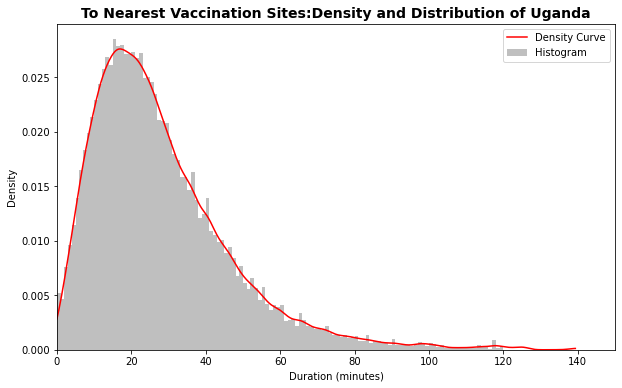

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde

import pandas as pd
# Convert 'duration' to numeric, coercing errors to NaN
Country['duration'] = pd.to_numeric(Country['duration'], errors='coerce')
Country['grid_code'] = pd.to_numeric(Country['grid_code'], errors='coerce')

# Drop rows with NaN values in 'duration' column
Country = Country.dropna(subset=['duration'])
Country_sorted = Country.groupby('pointid', group_keys=False).apply(lambda x: x.sort_values(by='duration'))
# Drop duplicates based on 'origin' and 'dest' columns, keeping the first (which is the smallest due to sorting)
Country_nearest = Country_sorted.drop_duplicates(subset=['pointid'], keep='first')
# Convert seconds to minutes and create a new column for it
Country_nearest ['duration_min'] = Country_nearest['duration'] / 60

# 将 duration_min 列转换为 numpy 数组
duration_min_values = Country_nearest['duration_min'].to_numpy()

# 为了安全起见，确保 duration_min_values 是一维的
duration_min_values = duration_min_values.flatten()

# 创建一个核密度估计对象
kde = gaussian_kde(duration_min_values)

# 创建一个值的范围来评估 KDE
min_val = duration_min_values.min()  # 最小值
max_val = duration_min_values.max()  # 最大值
x = np.linspace(min_val, max_val, 1000)
kde_values = kde(x)  # 使用 KDE 对象评估这些点的密度

# 绘制直方图并添加标签
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(duration_min_values[duration_min_values <= 120], bins=np.arange(0, 121, 1), density=True, alpha=0.5, color='gray', label='Histogram')

# 绘制 KDE 曲线并添加标签
plt.plot(x, kde_values, color='r', label='Density Curve')

# 设置图例
plt.legend()

# 设置横轴标签
plt.xlabel('Duration (minutes)')

# 设置纵轴标签
plt.ylabel('Density')

# 设置图形标题，加粗并放大
plt.title('To Nearest Vaccination Sites:Density and Distribution of Uganda', fontweight='bold', fontsize=14)

# 设置x轴的显示范围
plt.xlim(0, 150)

# 展示图形
plt.show()